# Text Classification (NLP) using ULMFiT and fastai Library in Python
- [Reference](https://medium.com/analytics-vidhya/tutorial-on-text-classification-nlp-using-ulmfit-and-fastai-library-in-python-2f15a2aac065)

In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html 
!pip install fastai
# import libraries 
import fastai 
from fastai import * 
from fastai.text import * 
import pandas as pd 
import numpy as np 
from functools import partial 
import io 
import os

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
     |████████████████████████████████| 704.8MB 25kB/s 


In [2]:
from sklearn.datasets import fetch_20newsgroups 
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove= 
                             ('headers', 'footers', 'quotes'))
documents = dataset.data

In [3]:
df = pd.DataFrame({'label':dataset.target, 'text':dataset.data})
df.shape

(11314, 2)

In [0]:
df = df[df['label'].isin([1,10])] 
df = df.reset_index(drop = True)

In [5]:
df['label'].value_counts()

10    600
1     584
Name: label, dtype: int64

# Data Preprocessing

In [0]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")

In [8]:
import nltk 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
# tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split()) 
# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x:[item for item in x if 
                                    item not in stop_words]) 

# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)):
    t =' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
df['text'] = detokenized_doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.model_selection import train_test_split 
# split data into training and validation set 
df_trn, df_val = train_test_split(df, stratify = df['label'], 
                                  test_size = 0.4, 
                                  random_state = 12)
df_trn.shape, df_val.shape

((710, 2), (474, 2))

In [13]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df_trn, valid_df = df_val, vocab=data_lm.train_ds.vocab, bs=32)

In [15]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.7)

In [16]:
# train the learner object with learning rate = 1e-2 
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.106271,5.199023,0.246779,00:02


In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


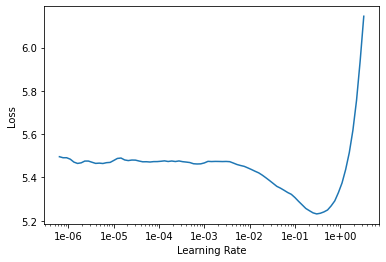

In [18]:
learn.recorder.plot()

In [0]:
learn.save_encoder('ft_enc')

In [21]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.7) 
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (710 items)
x: TextList
xxbos xxmaj it looks like xxmaj edmonton xxmaj oilers decided take xxmaj european xxunk spring xxmaj ranford xxmaj tugnutt xxmaj benning xxmaj manson xxmaj smith xxmaj buchberger xxmaj corson playing xxmaj canada xxmaj podein xxmaj weight playing xxup us xxmaj is xxmaj kravchuk playing xxmaj xxunk i know nagging injuries late season xxmaj podein interesting case eligible play xxmaj cape xxmaj breton xxup ahl playoffs like xxmaj kovalev xxmaj zubov xxmaj andersson obviously xxmaj sather xxmaj pocklington total xxunk everyone makes certainly case massively xxunk xxmaj paramount xxmaj new xxmaj york xxmaj rangers,xxbos xxmaj this xxunk xxmaj speaking die hard i i read xxunk hard xxunk xxmaj toronto xxmaj cup finals xxmaj first anyone planet heard team xxmaj detroit xxmaj al xxmaj xxunk however spell idiot name must xxmaj chicago xxup espn said even close xxmaj chicago xxunk win xxmaj norris xxmaj division xxmaj p

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


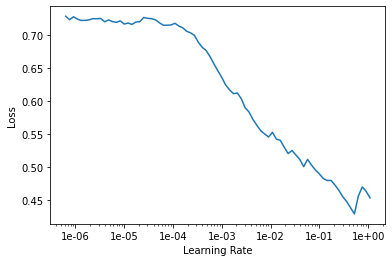

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.332871,0.194733,0.943038,00:07


In [24]:
# get predictions 
preds, targets = learn.get_preds() 
predictions = np.argmax(preds, axis = 1) 
pd.crosstab(predictions, targets)

col_0,0,1
row_0,,
0,224,17
1,10,223
